In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


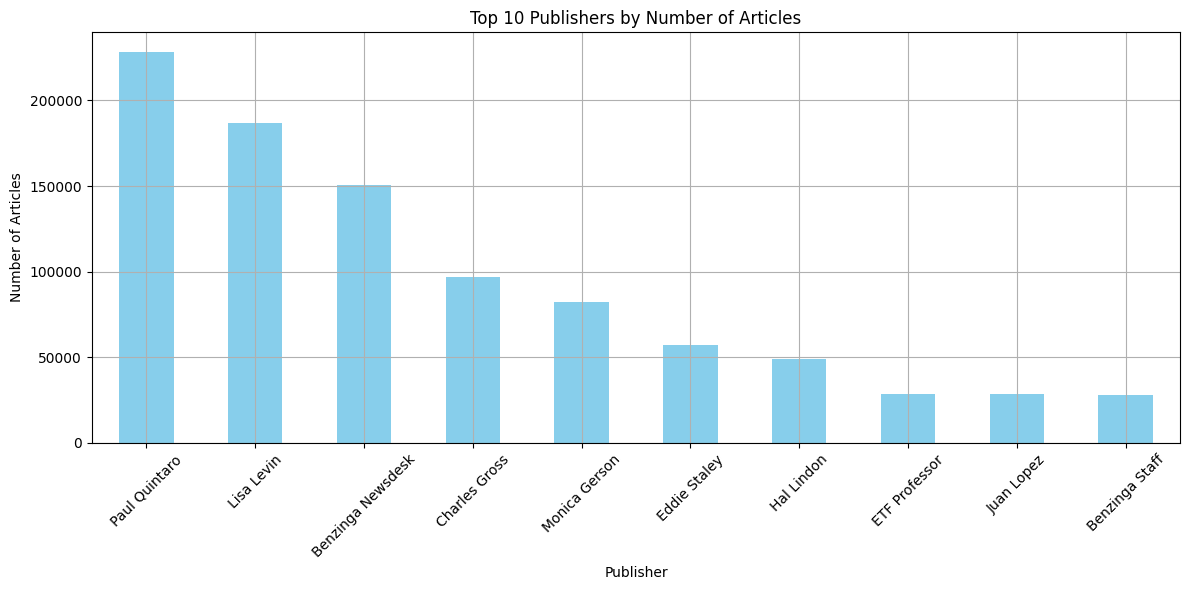

In [8]:
# Plot the top 10 publishers by number of articles
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

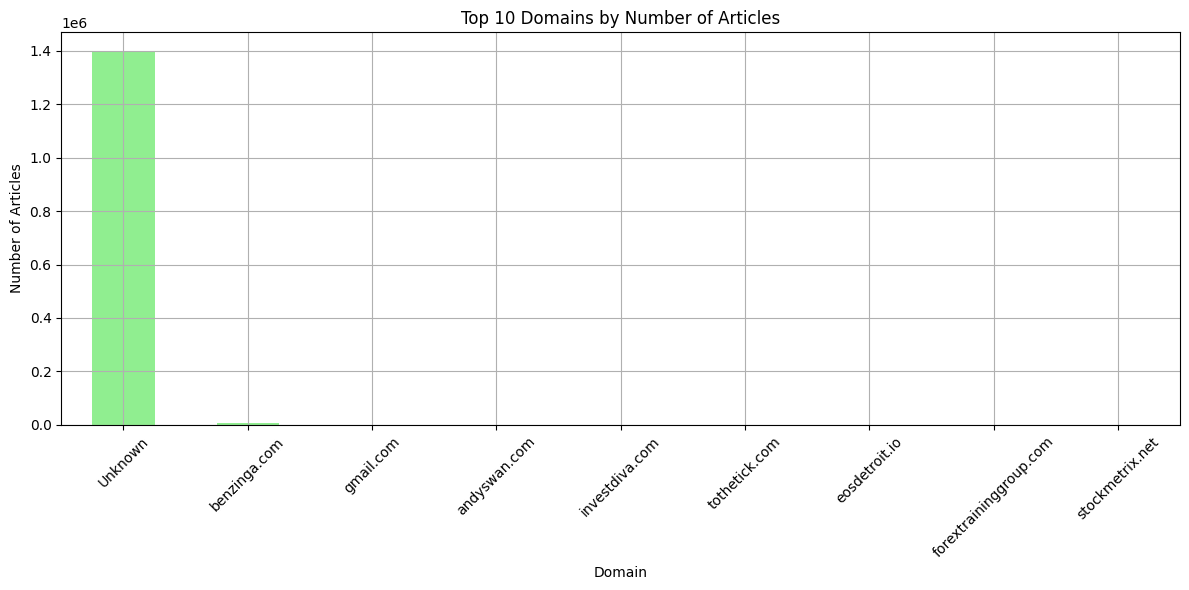

In [10]:
### 2. Unique Domain Identification ###

# Extract domain names if emails are used as publisher names
def extract_domain(email):
    return email.split('@')[-1] if '@' in email else 'Unknown'

data['Domain'] = data['publisher'].apply(extract_domain)

# Count the number of articles by domain
domain_counts = data['Domain'].value_counts()

# Plot the top 10 domains by number of articles
plt.figure(figsize=(12, 6))
domain_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [20]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Domain,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Unknown,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Unknown,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Unknown,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Unknown,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Unknown,Neutral


In [19]:
data['sentiment'] = data['headline'].apply(get_sentiment)

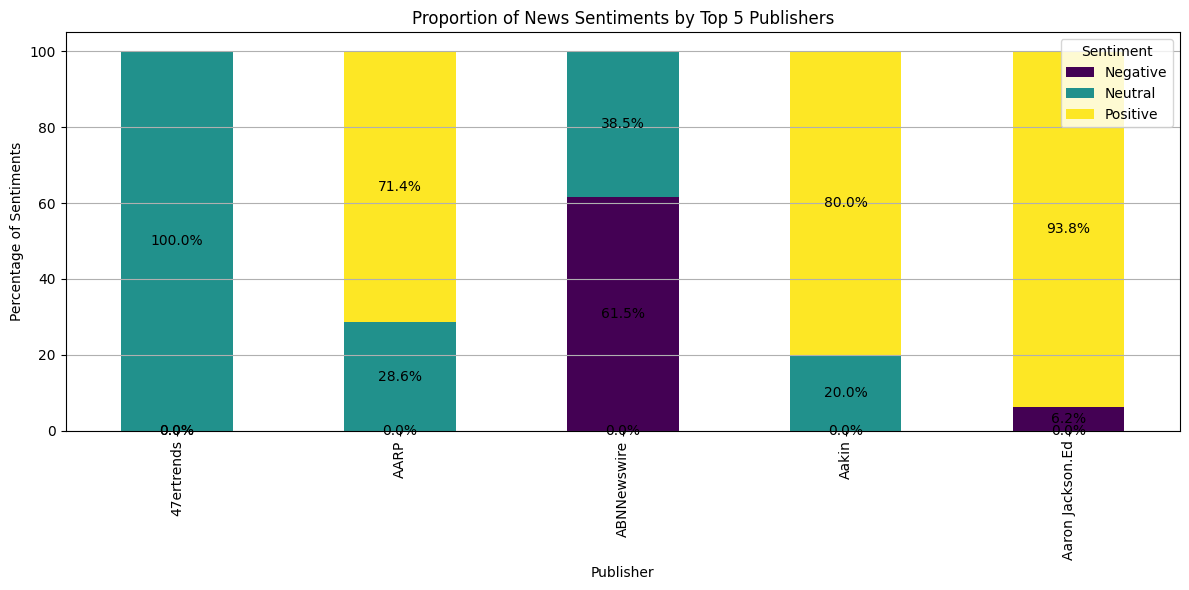

In [23]:
# Normalize to see the proportion of each sentiment reported by publishers (in percentages)
news_type_by_publisher_normalized = news_type_by_publisher.div(news_type_by_publisher.sum(axis=1), axis=0) * 100

# Plot the proportion of sentiments reported by the top 5 publishers
top_5_publishers = news_type_by_publisher_normalized.head(5)
ax = top_5_publishers.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add percentage labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Customize the plot
plt.title('Proportion of News Sentiments by Top 5 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Percentage of Sentiments')
plt.legend(title='Sentiment')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()